## Build a model to predict the Stock price of Tesla 

### Problem Statement:
Tesla is an amAmericanlectric vehicle company whose aim is to accelerate the world’s transition towards sustainable energy. A few days back the rise in the stock prices of Tesla made Elon Musk the richest person in the world.
Stock Price prediction is one of the most important things in financial world as it decides the flow of a company
towards profit or loss in future. Prediction of a stock value of a particular entity or a company is a tough and difficult thing to do. Since early 1980 s investing money into the companies by taking some of its stock had become a big thing (trend).

The goal of this challenge is to build a machine learning model that predicts the future stock price of Tesla.

### Dataset:

The dataset provided here contains information about Stock price of Tesla.
Our goal is to predict the future stock price, based on historical data. It is easy to pull historical prices from publicly available sources. we pulled data for the past 365 days from Yahoo! finance.

Here is historical data, from 2019-01-01 - 2021-12-31:

use this dataset to predict what will the stock price be in the next years. 

### Step 1: Import all the required libraries


 - Pandas : 
In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis and storing in a proper way. In particular, it offers data structures and operations for manipulating numerical tables and time series

 - Sklearn : 
Scikit-learn (formerly scikits.learn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn.

 - Pickle : 
Python pickle module is used for serializing and de-serializing a Python object structure. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.

 - Seaborn : 
Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.


In [1]:
#Loading libraries 
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

### Step 2 : Read dataset and basic details of dataset

#### Goal:- 
In this step we are going to read the dataset, view the dataset and analysis the basic details like total number of rows and columns, what are the column data types and see to need to create new column or not.

##### In this stage we are going to read our problem dataset and have a look on it.

In [2]:
#loading training data
try:
    df = pd.read_csv('E:\python program\FinalProject\TSLA (1) (1).csv')
    print('Data read done successfully...')
except (FileNotFoundError, IOError):
    print("Wrong file or file path")   

Data read done successfully...


In [3]:
#get five raws
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,20.406668,21.008667,19.920000,20.674667,20.674667,174879000
1,2019-01-03,20.466667,20.626667,19.825333,20.024000,20.024000,104478000
2,2019-01-04,20.400000,21.200001,20.181999,21.179333,21.179333,110911500
3,2019-01-07,21.448000,22.449333,21.183332,22.330667,22.330667,113268000
4,2019-01-08,22.797333,22.934000,21.801332,22.356667,22.356667,105127500


After we read the data, we can look at the data using:
There are multiple variables in the dataset – Date, Open, High, Low, close, Adj Close and Volume

- The columns Open and Close represent the starting and final price at which the stock is traded on a particular day.

- High and Low  represent the maximum and minimum price of the share for the day.

- Volume is one of the basic and benficial concepts to understand when trading stocks.

- An adjusted closing price is often used when examining historical returns or performing a detailed analysis on historical returns.

Another important thing to note is that the market is closed on weekends and public holidays. Notice the above table again, some date values are missing – 01/01/2019, 05/01/019 and 06/01/2010. Of these dates,1st is public holiday and 5th and 6th fall on a weekend.

In [4]:
# count the total number of rows and columns.
print ('The train data has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The train data has 757 rows and 7 columns


- The profit or loss calculation is usually determined by the closing price of a stock for the day, hence we will consider the closing price as the target(Dependent) variable. 
 
- Now we got the target variable as Close, now our problem is build as a supervised learning and our target variable is in continuos data values so we have to apply regression algorithms to build a model

In [5]:
#Get summerization information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       757 non-null    object 
 1   Open       757 non-null    float64
 2   High       757 non-null    float64
 3   Low        757 non-null    float64
 4   Close      757 non-null    float64
 5   Adj Close  757 non-null    float64
 6   Volume     757 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 41.5+ KB


with the info function will get to know that we have zero non null values to whole dataset and we have total 2 types of data types in dataset which is, numerical(int and float) and object

Now will count the separatly every data type column list

In [6]:
int64_cols = ['int64']
int64_lst = list(df.select_dtypes(include=int64_cols).columns)

In [7]:
print("total number of numerical columns are ", len(int64_lst))
print("there names are as follows: ", int64_lst)

total number of numerical columns are  1
there names are as follows:  ['Volume']


In [8]:
object_cols = ['object']
object_lst = list(df.select_dtypes(include=object_cols).columns)

In [9]:
print("total number of object columns are ", len(object_cols))
print("there names are as follows: ", object_lst)

total number of object columns are  1
there names are as follows:  ['Date']


In [10]:
float64_cols = ['float64']
float64_lst = list(df.select_dtypes(include=float64_cols).columns)

In [11]:
print("total number of numerical columns are ", len(float64_lst))
print("there names are as follows: ", float64_lst)

total number of numerical columns are  5
there names are as follows:  ['Open', 'High', 'Low', 'Close', 'Adj Close']


as we have Date column in our dataset, we count the unique values of Date column which shown below and also len of dataset

In [12]:
len(df['Date'].unique()), df.shape[0]

(757, 757)

1.we notice that uniqueness of Date column and length of the dataset both are same that means there is no missing index according to length

2.If we observe carefully we can see that the data in the ‘Close’ column and that available in the ‘Adj Close’ column is the same let’s check whether this is the case with each row or not.

In [13]:
df[df['Close'] == df['Adj Close']].shape

(757, 7)

From here we can conclude that all the rows of columns ‘Close’ and ‘Adj Close’ have the same data. So, having redundant data in the dataset is not going to help so, we’ll drop this column before further analysis.

now Adj Close column we don't need.

so we have to drop 'Adj Close' column

In [14]:
#Drop unrequired column
df = df.drop(['Adj Close'], axis=1)

In [15]:
#Get summerization information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    757 non-null    object 
 1   Open    757 non-null    float64
 2   High    757 non-null    float64
 3   Low     757 non-null    float64
 4   Close   757 non-null    float64
 5   Volume  757 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 35.6+ KB


Step 2 Insights:-

- Close column -> Dependent or target Variable
- Open,High,Low,Volume columns -> Independent or feature variable

We have total 6 features where 4 of them are float type while 1 is integer type and 1 is object type.

Drop 'Adj Close' columns.

### Step 3: Descriptive Analysis

Goal/Purpose:-
Things we are going to do in this step:

1.Mean

2.Median

3.Mode

4.Standard Deviation

5.Variance

6.Null Values

7.NaN Values

8.Min value

9.Max value

10.Count Value

11.Quatilers

12.Correlation

13.Skewness

In [16]:
df.describe(include='all')

,Date,Open,High,Low,Close,Volume
count,757,757.000000,757.000000,757.000000,757.000000,7.570000e+02
unique,757,NaN,NaN,NaN,NaN,NaN
top,2019-01-02,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,124.801651,127.579012,121.865742,124.929014,1.485965e+08
std,NaN,110.195660,112.527703,107.680440,110.289587,1.023775e+08
min,NaN,12.073333,12.445333,11.799333,11.931333,2.940180e+07
25%,NaN,20.773333,21.086666,20.233334,20.813999,7.892820e+07
50%,NaN,81.431999,81.866669,79.040001,80.577332,1.155795e+08
75%,NaN,223.880005,228.850006,218.353333,223.333328,1.890093e+08


### Measure the variability of data of the dataset
Variability describes how far apart data points lie from each other and from the center of a distribution.

#### 1. Standard Deviation

The standard deviation is the average amount of variability in your dataset.

It tells you, on average, how far each data point lies from the mean. The larger the standard deviation, the more variable the data set is and if zero variance then there is no variability in the dataset that means there no use of that dataset.

In [17]:
df.std()

Open      1.101957e+02
High      1.125277e+02
Low       1.076804e+02
Close     1.102896e+02
Volume    1.023775e+08
dtype: float64

with the above shown column values we noticed that all columns or features ('Open', 'High', 'Low', 'Close', 'Volume') have not 0 standard deviation (std) value. That means this value does change there value in the whole dataset so we have not to remove any columns in our data preparation step.

### 2. Variance
The variance is the average of squared deviations from the mean. A deviation from the mean is how far a score lies from the mean.

Variance is the square of the standard deviation. This means that the units of variance are much larger than those of a typical value of a data set.

In [18]:
df.var()

Open      1.214308e+04
High      1.266248e+04
Low       1.159508e+04
Close     1.216379e+04
Volume    1.048115e+16
dtype: float64

with the above shown column values we noticed that all columns or features ( 'Open', 'High', 'Low', 'Close', 'Volume') have not 0 variance value. That means this value does change there value in the whole dataset so we have not to remove that columns in our data preparation step.

### Measure central tendency
A measure of central tendency is a single value that attempts to describe a set of data by identifying the central position within that set of data. As such, measures of central tendency are sometimes called measures of central location. They are also classed as summary statistics.

### 1. Mean
The mean is the arithmetic average, and it is probably the measure of central tendency that you are most familiar.

In [19]:
df.mean()

Open      1.248017e+02
High      1.275790e+02
Low       1.218657e+02
Close     1.249290e+02
Volume    1.485965e+08
dtype: float64

with the above shown column values we noticed that all columns or features ( 'Open', 'High', 'Low', 'Close', 'Volume') have not 0 variance value. That means this value does change there value in the whole dataset so we have not to remove that columns in our data preparation step.

### 2. Median
The median is the middle value. It is the value that splits the dataset in half.

In [20]:
df.median()

Open      8.143200e+01
High      8.186667e+01
Low       7.904000e+01
Close     8.057733e+01
Volume    1.155795e+08
dtype: float64

A variable that have mean and median normal value

3. Mode

The mode is the value that occurs the most frequently in your data set. On a bar chart, the mode is the highest bar. If the data have multiple values that are tied for occurring the most frequently, you have a multimodal distribution. If no value repeats, the data do not have a mode.

In [21]:
def mode_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value', 'string_value']
    zero_value = 0
    normal_value = 0
    string_value = 0
    
    for value in int64_lst:
                
        rs = df[value].mode()[0]
        
        if isinstance(rs, str):
            string_value = string_value + 1
        else:

            if rs > 0:
                normal_value = normal_value + 1

            elif rs == 0:
                zero_value = zero_value + 1
    
    mode_total_df =  pd.DataFrame([[normal_value, zero_value, string_value]], columns=cols) 
    
    return mode_total_df

In [22]:
mode_cal(df, list(df.columns))

,normal_value,zero_value,string_value
0,5,0,1


In [23]:
def mode_cal(df,float64_lst):
    
    cols = ['normal_value', 'zero_value', 'string_value']
    zero_value = 0
    normal_value = 0
    string_value = 0
    
    for value in float64_lst:
                
        rs = df[value].mode()[0]
        
        if isinstance(rs, str):
            string_value = string_value + 1
        else:

            if rs > 0:
                normal_value = normal_value + 1

            elif rs == 0:
                zero_value = zero_value + 1
    
    mode_total_df =  pd.DataFrame([[normal_value, zero_value, string_value]], columns=cols) 
    
    return mode_total_df

In [24]:
mode_cal(df, list(df.columns))

,normal_value,zero_value,string_value
0,5,0,1


### Null and Nan values


1. Null Values

In [25]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

as we notice that there are no null values in our dataset.

2. Nan values

In [26]:
df.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

as we notice that there are no nan (Not a number) values in our dataset.

Skewness of the columns

In [27]:
def right_nor_left(df, int64_lst):
    
    temp_skewness = ['column', 'skewness_value', 'skewness (+ve or -ve)']
    temp_skewness_values  = []
    
    temp_total = ["positive (+ve) skewed", "normal distrbution" , "negative (-ve) skewed"]
    positive = 0
    negative = 0
    normal = 0
    
    for value in int64_lst:
    
        rs = round(df[value].skew(),4)

        if rs > 0:
            temp_skewness_values.append([value,rs , "positive (+ve) skewed"])   
            positive = positive + 1

        elif rs == 0:
            temp_skewness_values.append([value,rs,"normal distrbution"])
            normal = normal + 1

        elif rs < 0:
            temp_skewness_values.append([value,rs, "negative (-ve) skewed"])
            negative = negative + 1
    
    skewness_df =  pd.DataFrame(temp_skewness_values, columns=temp_skewness) 
    skewness_total_df =  pd.DataFrame([[positive, normal, negative]], columns=temp_total) 
    
    return skewness_df, skewness_total_df


In [28]:
int64_cols = ['int64']
int64_lst_col = list(df.select_dtypes(include=int64_cols).columns)

skew_df,skew_total_df = right_nor_left(df, int64_lst_col)

In [29]:
skew_df

,column,skewness_value,skewness (+ve or -ve)
0,Volume,2.1697,positive (+ve) skewed


In [30]:
def right_nor_left(df, float64_lst):
    
    temp_skewness = ['column', 'skewness_value', 'skewness (+ve or -ve)']
    temp_skewness_values  = []
    
    temp_total = ["positive (+ve) skewed", "normal distrbution" , "negative (-ve) skewed"]
    positive = 0
    negative = 0
    normal = 0
    
    for value in float64_lst:
    
        rs = round(df[value].skew(),4)

        if rs > 0:
            temp_skewness_values.append([value,rs , "positive (+ve) skewed"])   
            positive = positive + 1

        elif rs == 0:
            temp_skewness_values.append([value,rs,"normal distrbution"])
            normal = normal + 1

        elif rs < 0:
            temp_skewness_values.append([value,rs, "negative (-ve) skewed"])
            negative = negative + 1
    
    skewness_df =  pd.DataFrame(temp_skewness_values, columns=temp_skewness) 
    skewness_total_df =  pd.DataFrame([[positive, normal, negative]], columns=temp_total) 
    
    return skewness_df, skewness_total_df

In [31]:
float64_cols = ['float64']
float64_lst_col = list(df.select_dtypes(include=float64_cols).columns)

skew_df,skew_total_df = right_nor_left(df, float64_lst_col)

In [32]:
skew_df

,column,skewness_value,skewness (+ve or -ve)
0,Open,0.5972,positive (+ve) skewed
1,High,0.5995,positive (+ve) skewed
2,Low,0.5946,positive (+ve) skewed
3,Close,0.5969,positive (+ve) skewed


In [33]:
skew_total_df

,positive (+ve) skewed,normal distrbution,negative (-ve) skewed
0,4,0,0


we notice with the above results that all columns are Positive(+ve) skewed

Step 3 Insights:-

With the statistical analysis we have found that the data have a lot of skewness in them all are +vely skewed while all of the columns values have varience

### Step 4: Data Exploration

Goal/Purpose:-

Graphs we are going to develop in this step

1.Histogram of all columns to check the distrubution of the columns

2.Distplot or distribution plot of all columns to check the variation in the data distribution

3.Heatmap to calculate correlation within feature variables

4.Boxplot to find out outlier in the feature columns

1. Histogram

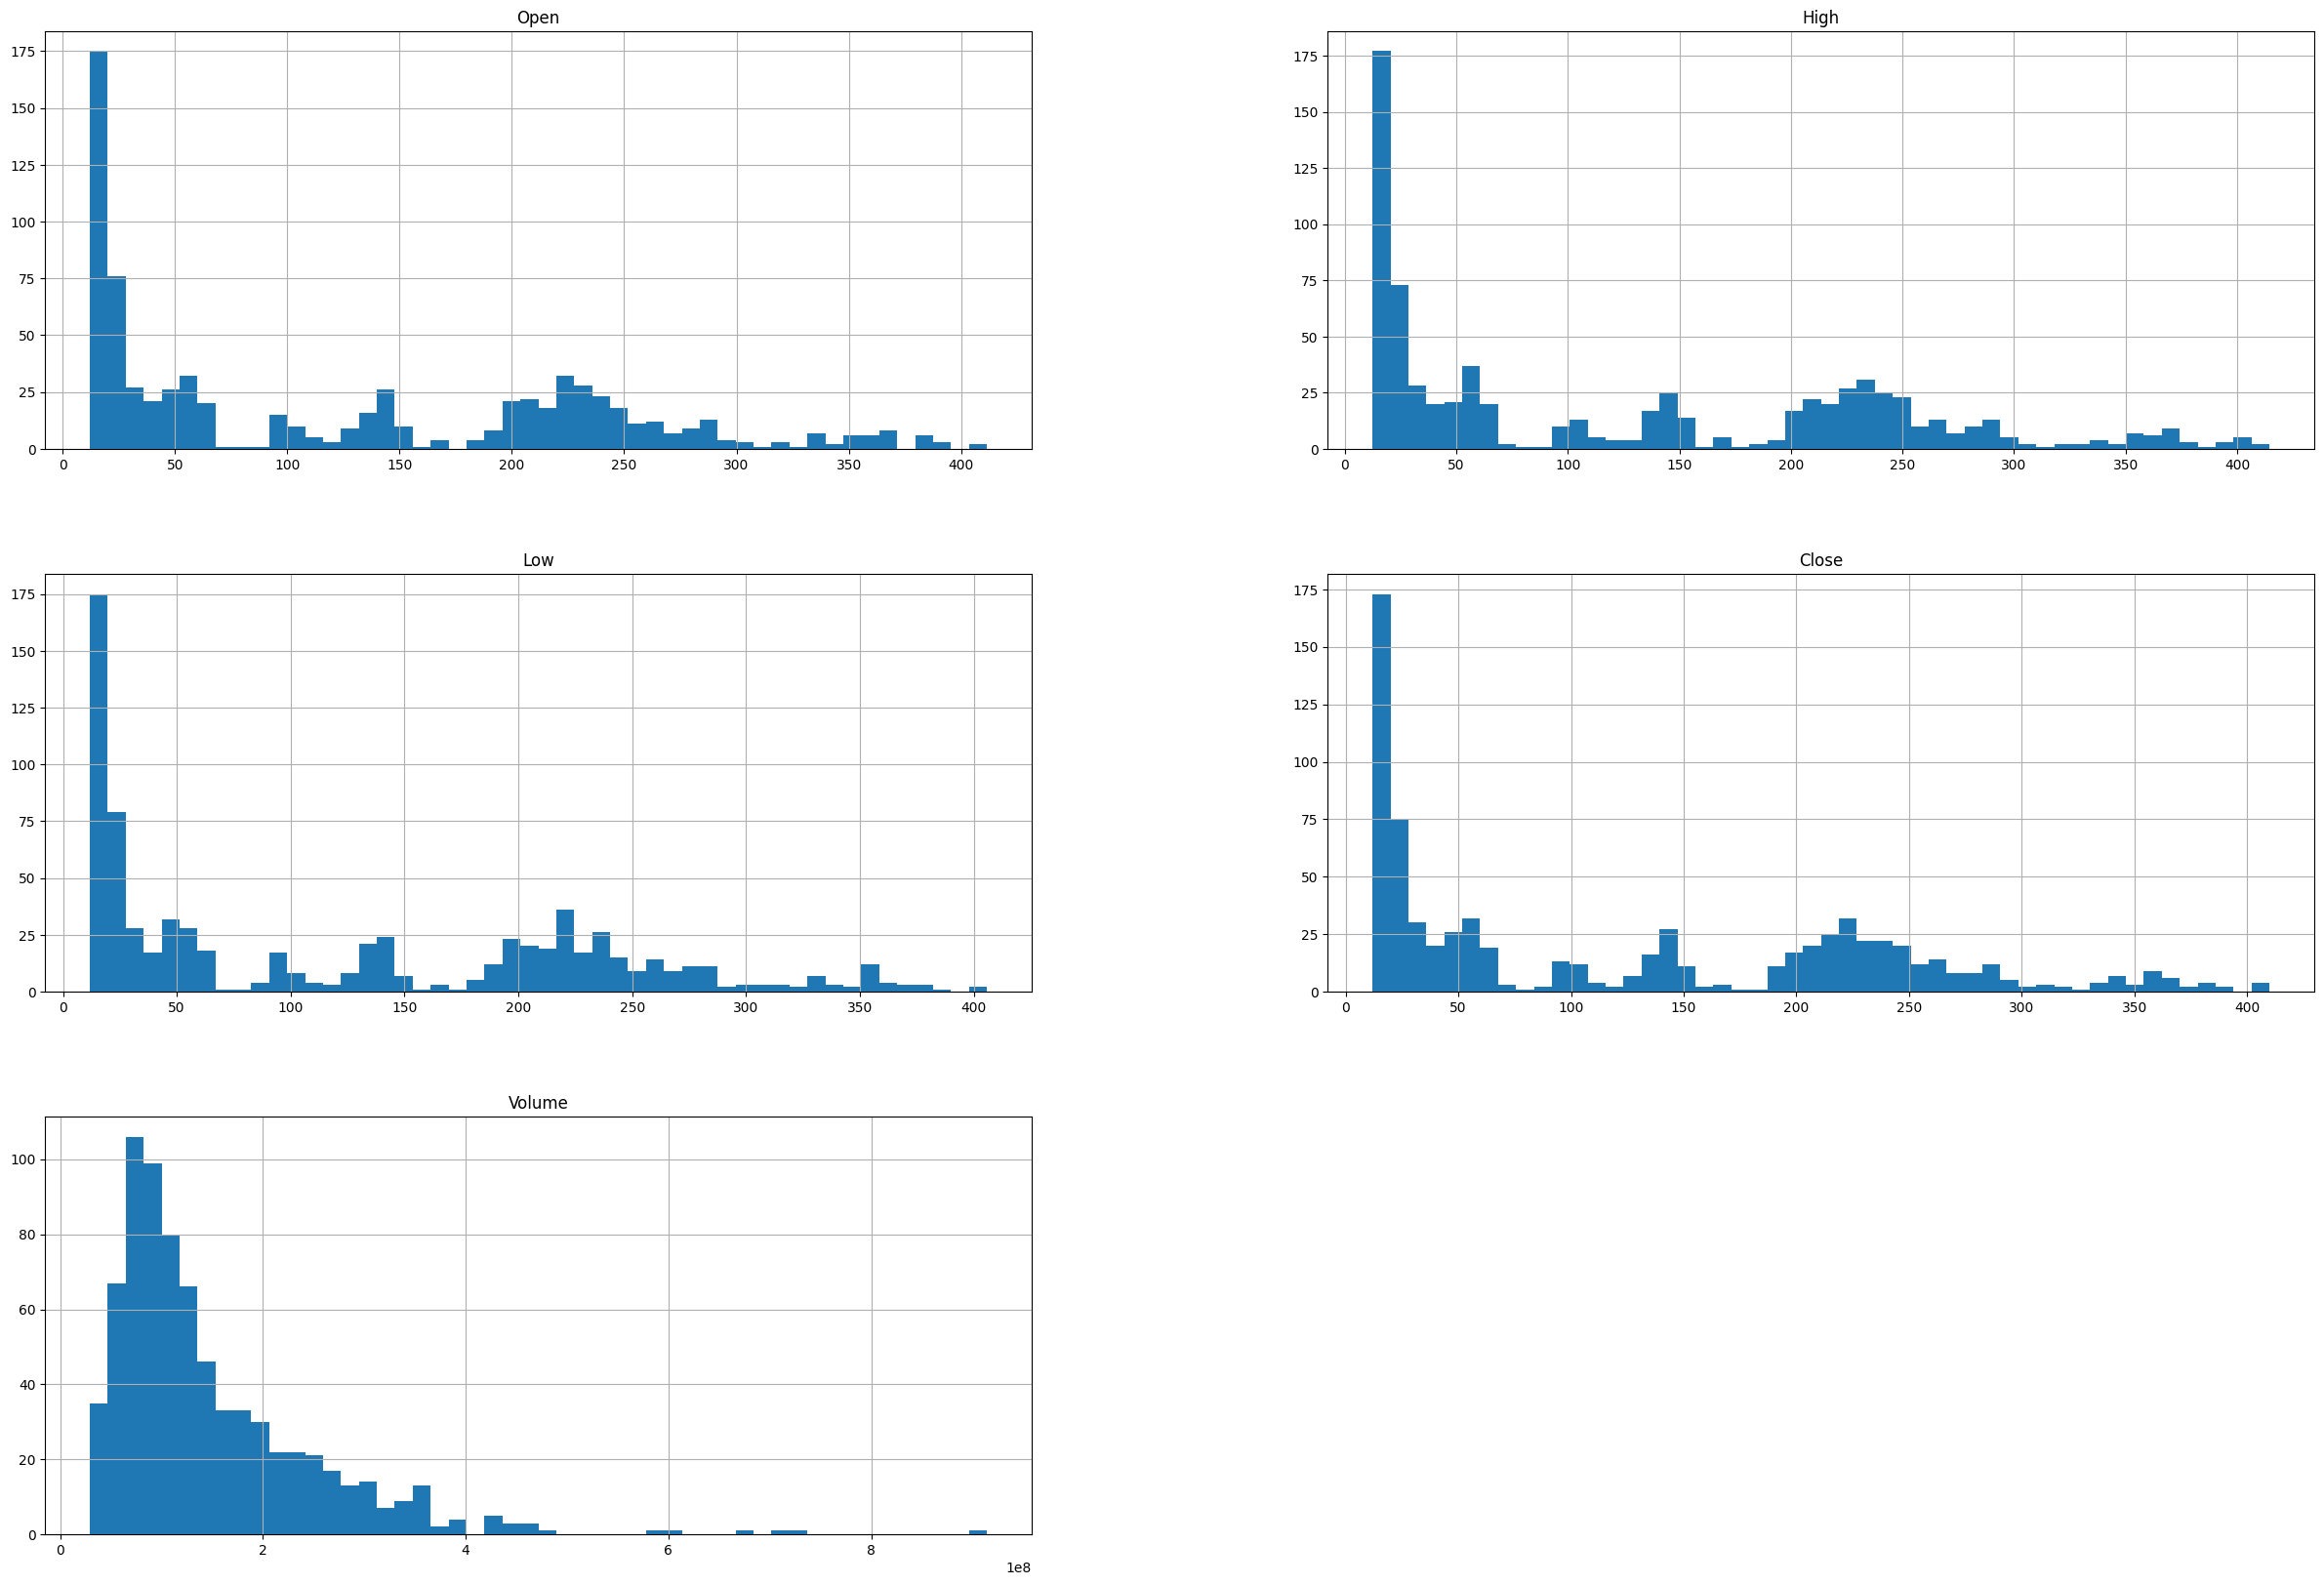

In [34]:
# Distribution in attributes
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(30,20))
plt.show()

2. Distplot

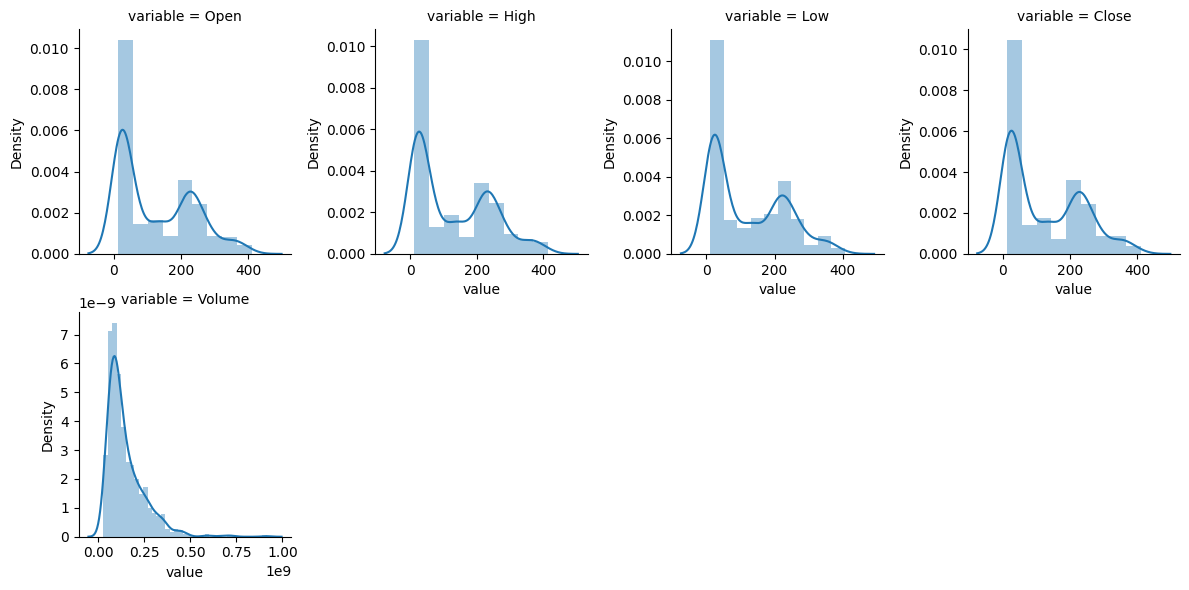

In [35]:
num = [f for f in df.columns if df.dtypes[f] != 'object']
nd = pd.melt(df, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

above we draw distrution bar graphs to confirm about statiscts of the data that we got our data have skewness so here also we notice with the above results that we have all columns are positive skewed

Let's proceed and check the distribution of the target variable.

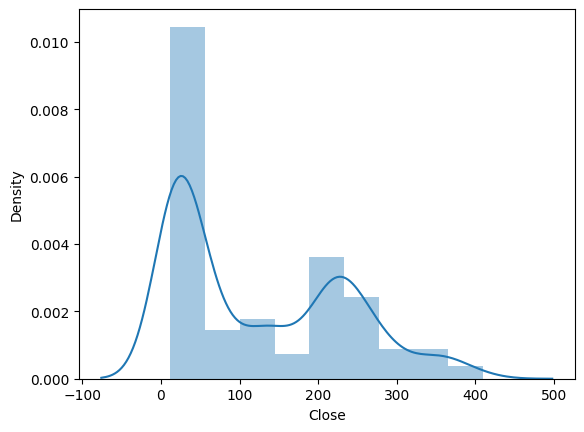

In [36]:
sns.distplot(df['Close'])
plt.show()

We see that the target variable days has a positive skewed distribution. In that case we'll need to log transform this variable so that it becomes normally distributed. A normally distributed (or close to normal) target variable helps in better modeling the relationship between target and independent variables. In addition, linear algorithms assume constant variance in the error term. Alternatively, we can also confirm this skewed behavior using the skewness metric.

3. Heatmap

Correlation within feature variables

Correlation - A positive correlation is a relationship between two variables in which both variables move in the same direction. Therefore, when one variable increases as the other variable increases, or one variable decreases while the other decreases.

Correlation can have a value:

1.1 is a perfect positive correlation

2.0 is no correlation (the values don't seem linked at all)

3.-1 is a perfect negative correlation

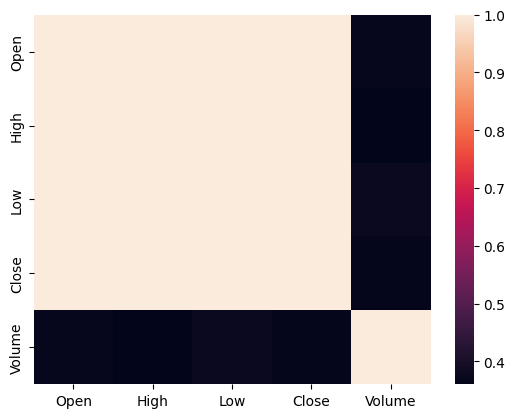

In [37]:
#correlation plot
corr = df.corr().abs()
sns.heatmap(corr)
plt.show()


In [38]:
corr

,Open,High,Low,Close,Volume
Open,1.000000,0.999555,0.999358,0.998843,0.368345
High,0.999555,1.000000,0.999276,0.999486,0.360434
Low,0.999358,0.999276,1.000000,0.999461,0.376488
Close,0.998843,0.999486,0.999461,1.000000,0.366870
Volume,0.368345,0.360434,0.376488,0.366870,1.000000


all features are highly correlated in Dataset except volume.

In [39]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [40]:
to_drop

['High', 'Low', 'Close']

As we see there are 'High','Low' and 'Close' feature columns with correlation greater than 0.95.

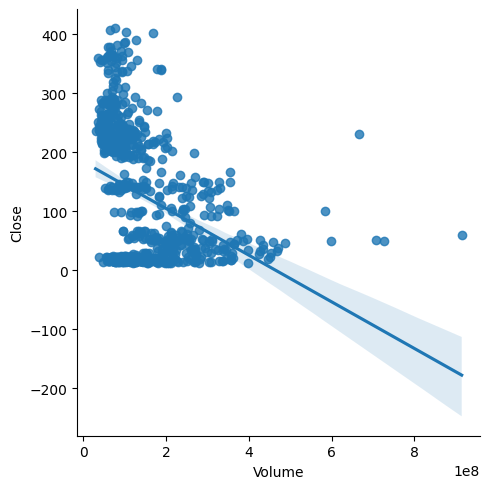

In [41]:
for value in int64_lst_col:
    sns.lmplot(x=value, y="Close", data=df);

plt.show()

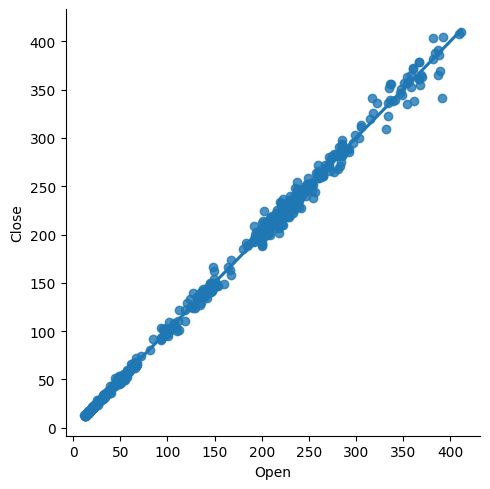

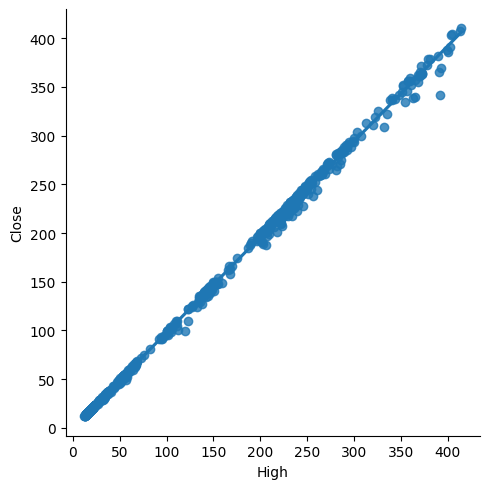

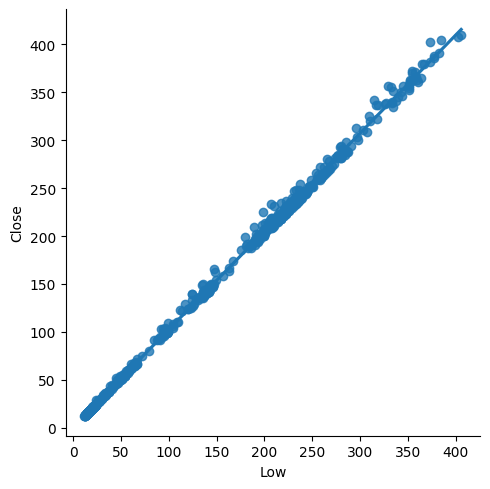

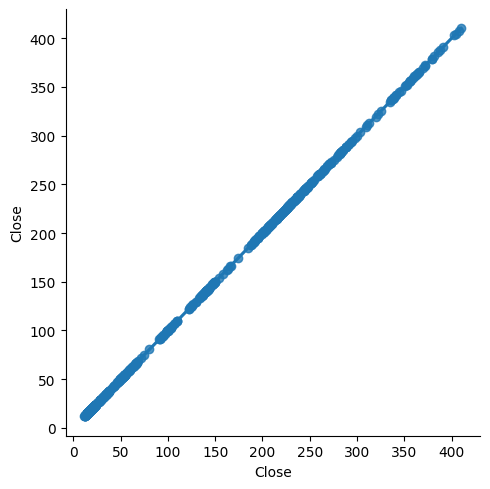

In [42]:
for value in float64_lst_col:
    sns.lmplot(x=value, y="Close", data=df);

plt.show()

4.Boxplot

Outliers

In statistics, an outlier is a data point that differs significantly from other observations. An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set.

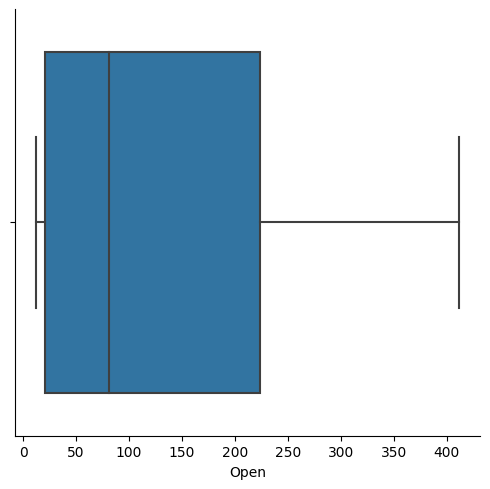

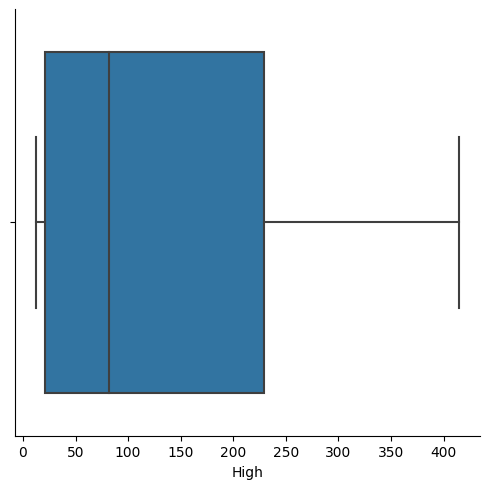

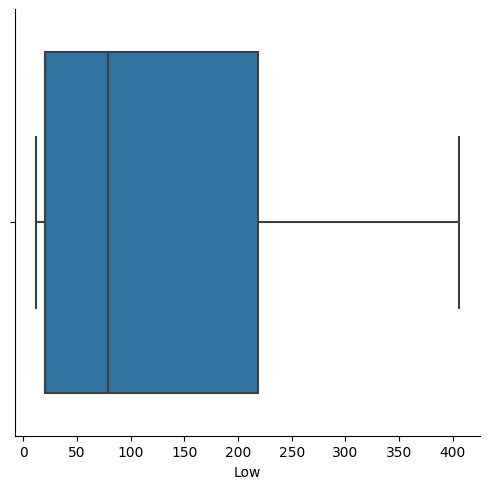

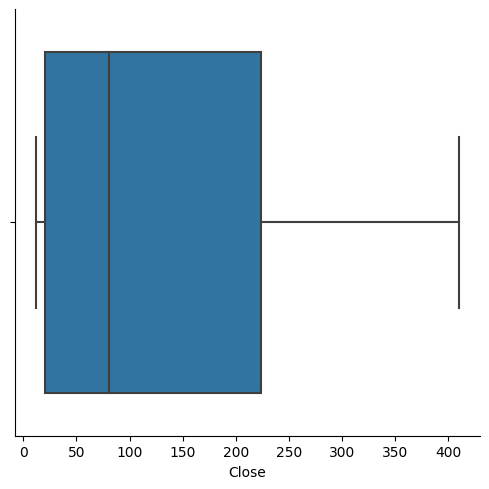

In [43]:
for value in float64_lst_col:
    sns.catplot(data=df, x=value, kind="box")
    
plt.show()

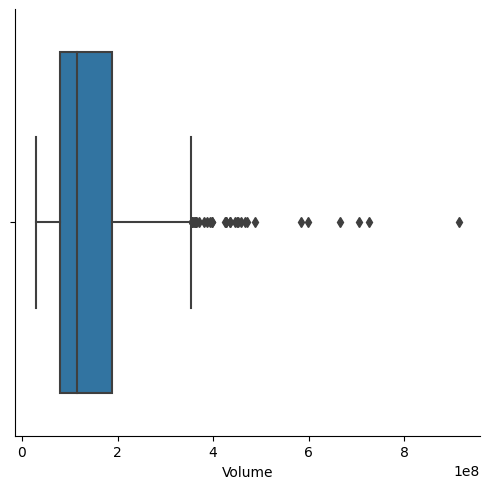

In [44]:
for value in int64_lst_col:
    sns.catplot(data=df, x=value, kind="box")
    
plt.show()

Step 4 Insights:

In this we confirmed that about skewness of the columns, there are 'High' , 'Low' and 'Close' columns which have more than 0.95 correlation value between them and also found the volume column has outliers.

Step 5: Data pre-processing

in this stage we'll deal with skewness of target variabels and outliers in Volume Column

skewness treatment on target variable

<AxesSubplot: xlabel='Close', ylabel='Density'>

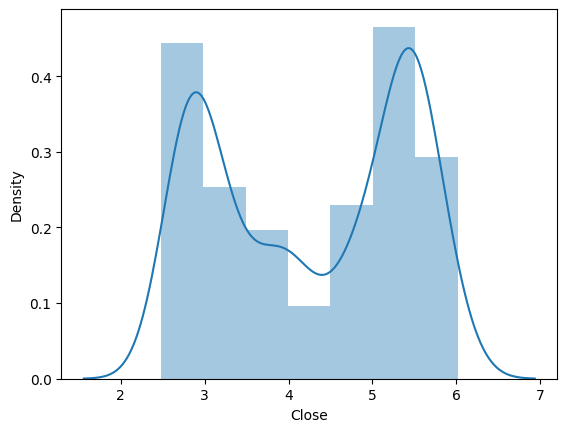

In [45]:
sns.distplot(np.log(df['Close']))

Outlier Treatement

In [46]:
# first check number of raws and columns before outlier treatement
df.shape

(757, 6)

In [47]:
Q1=df['Volume'].quantile(0.25)
Q3=df['Volume'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

78928200.0
189009300.0
110081100.0
-86193450.0 354130950.0


In [48]:
df1= df[df['Volume']< Upper_Whisker]

In [49]:
df1.shape

(723, 6)

In [50]:
# save preprocess dataframe to csv for model training purpose
df1.to_csv('TSLA(1)(3).csv')